# **Layton Lab Data Analysis project**

**Group Members:** Delaney Smith, Melissa Stadt

Determining useful reviews

In [1]:
# note: conda environment data_review is set up for this notebook
import os

import IPython

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns

# these are scripts with functions made
from basic_functions import*
from text_process import*

import nltk

import plotly
from plotly import tools
import plotly.graph_objs as go

import string

# Import data

This is to look at what the data set has to get an idea of what is going on overall and then will breakdown into the birth control data

In [2]:
test = pd.read_csv('./data/drugsComTest_raw.csv')
train = pd.read_csv('./data/drugsComTrain_raw.csv')

In [3]:
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} columns')
print(f'test has {test.shape[0]} number of rows and {test.shape[1]} columns')


train has 161297 number of rows and 7 columns
test has 53766 number of rows and 7 columns


Combine the train and test set to see the total amount of data we have available.

In [4]:
merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [6]:
print(merged_data['condition'].nunique())

916


In [7]:
print(merged_data)

        uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
215058    159999                 Tamoxifen     Breast Cancer, Prevention   
215059    140714              Escitalopram                       Anxiety   
215060    130945            Levonorgestrel                 Birth Control   
215061     47656                Tapentadol                          Pain   
215062    113712                 Arthrotec                      Sciatica   

                                                   review  rating       date  \
0      

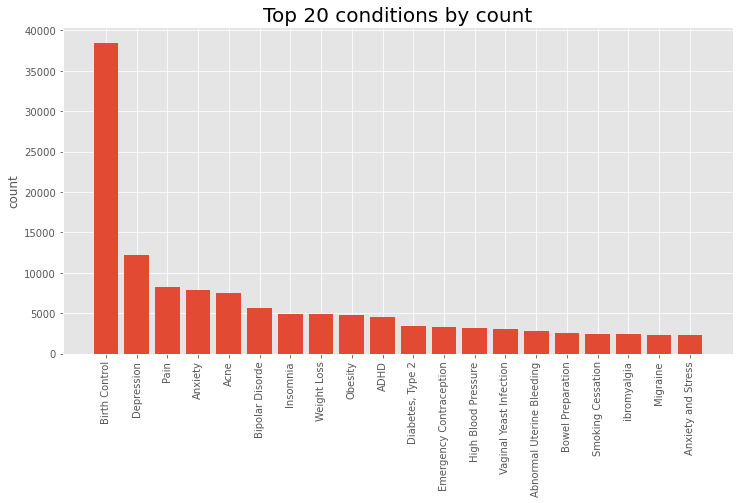

In [8]:
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top 20 conditions by count',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

We can see that birth control has the most data so we will start with building the model on the birth control data set since it is likely that different words will be used in different types of medications for different types of conditions (i.e., birth control reviews may refer to periods, pregnancy, cramps, etc. where as anxiety would refer to other symptoms/side effects)

# Birth control

Here we will consider the birth control data and break it down to drugs and analyze feature distributions as well as look at reviews.

bc_merged is the birth control data for the full merged (i.e., test and train) set

In [9]:
bc_merged = merged_data[merged_data['condition'] == 'Birth Control']

In [10]:
bc_merged.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,11-Aug-14,11
59,106703,Implanon,Birth Control,"""Never again! After being on depo I was suppos...",2,20-Aug-15,1
61,192806,Drospirenone / ethinyl estradiol,Birth Control,"""I was put on Yasmin for 6 months to regulate ...",3,11-Apr-11,8
63,107449,Implanon,Birth Control,"""I have been on this for 8 months and sad to s...",1,1-Sep-11,2
64,60156,NuvaRing,Birth Control,"""I was off birth control for a while consideri...",5,18-Apr-13,9
68,202903,Gildess Fe 1 / 20,Birth Control,"""it caused me to gain 30 pounds""",2,21-Sep-16,2


In [11]:
bc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38436 entries, 2 to 215060
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     38436 non-null  int64 
 1   drugName     38436 non-null  object
 2   condition    38436 non-null  object
 3   review       38436 non-null  object
 4   rating       38436 non-null  int64 
 5   date         38436 non-null  object
 6   usefulCount  38436 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.3+ MB


In [12]:
print(bc_merged['drugName'].nunique())

181


In [13]:
total_bc = bc_merged['uniqueID'].nunique()
print(total_bc)

38436


There are 38,436 instances for the birth control condition data with 181 different drugs.

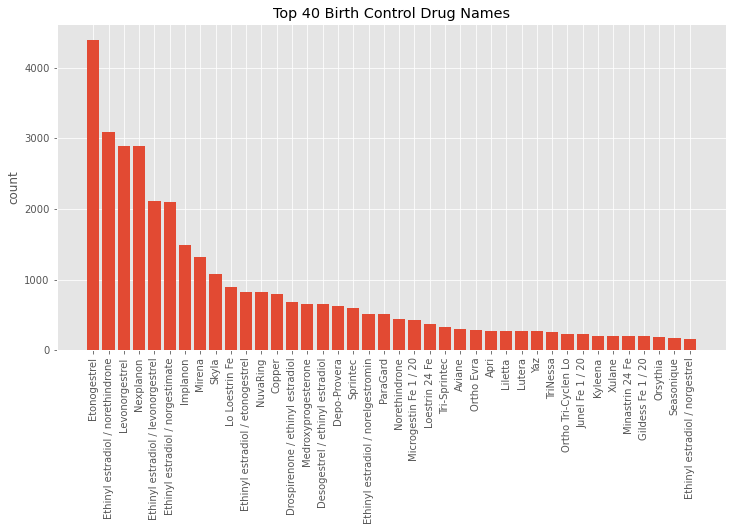

In [14]:
plt.figure(figsize = (12,6))
drugNames_top = bc_merged['drugName'].value_counts(ascending = False).head(40)

plt.bar(drugNames_top.index, drugNames_top.values)
plt.title('Top 40 Birth Control Drug Names')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

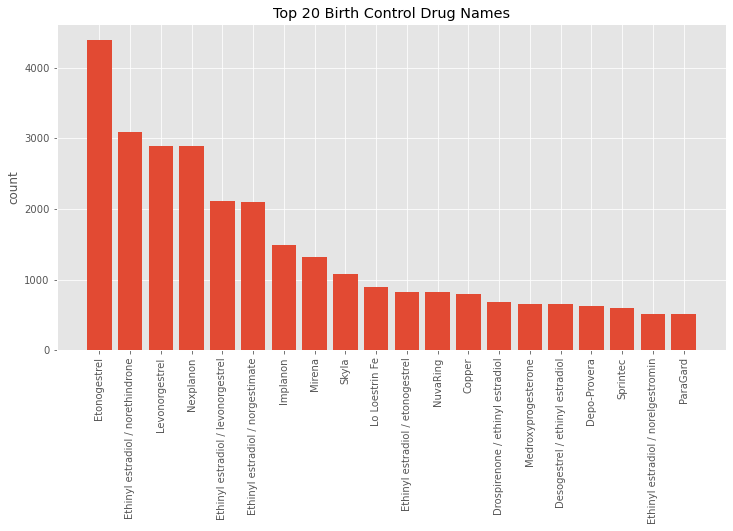

In [15]:
plt.figure(figsize = (12,6))
drugNames_top = bc_merged['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugNames_top.index, drugNames_top.values)
plt.title('Top 20 Birth Control Drug Names')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

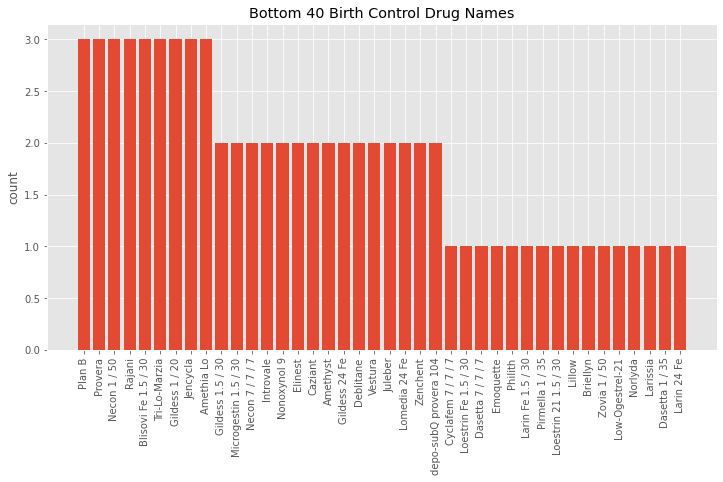

In [16]:
plt.figure(figsize=(12,6))
drugNames_bottom = bc_merged['drugName'].value_counts(ascending = False).tail(40) # last 40 drugs by review counts
plt.bar(drugNames_bottom.index, drugNames_bottom.values)
plt.title('Bottom 40 Birth Control Drug Names')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()


# Birth Control Drug Ratings

Below is analysis of the distribution of ratings for the birth control drug reviews

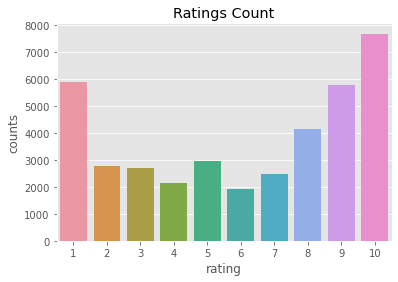

In [17]:
ratings = bc_merged['rating'].value_counts().sort_values(ascending=False).reset_index().rename(columns = {'index':'rating', 'rating':'counts'})
sns.barplot(x = ratings['rating'], y = ratings['counts'])
plt.title('Ratings Count')
plt.show()

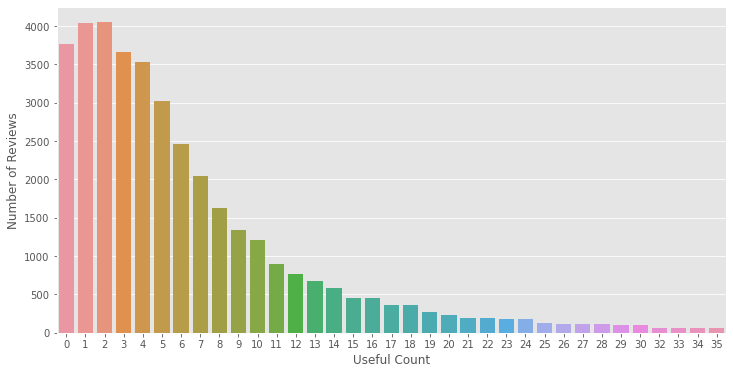

In [18]:
plt.figure(figsize=(12,6))
usefulness = bc_merged['usefulCount'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'Useful Count', 'usefulCount':'Number of Reviews'})
first35useful = usefulness.head(35)
sns.barplot(x = first35useful['Useful Count'], y = first35useful['Number of Reviews'])
#plt.title('Usefulness Score Counts')
plt.show()

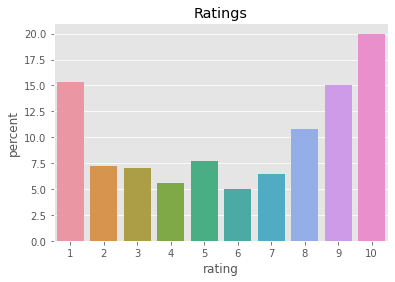

In [19]:
ratings['percent'] = 100*(ratings['counts']/bc_merged.shape[0])
sns.barplot(x = ratings['rating'], y = ratings['percent'])
plt.title('Ratings')
plt.show()

In [20]:
threshold = 7
below_threshold = sum(sum([bc_merged['rating']< threshold]))
print('Percent of birth control reviews below threshold: %.2f percent' % (100 * below_threshold/total_bc))

Percent of birth control reviews below threshold: 47.74 percent


Same plot as previous just giving percents. We can see that star ratings of 10 and 1 are the most frequent at 20% and 15%.

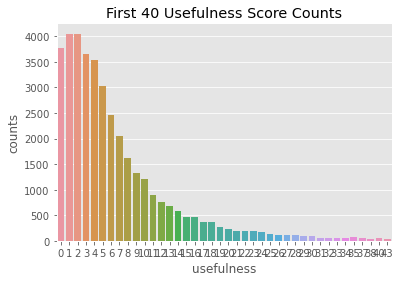

In [21]:
usefulness = bc_merged['usefulCount'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'usefulness', 'usefulCount':'counts'})
first40useful = usefulness.head(40)
sns.barplot(x = first40useful['usefulness'], y = first40useful['counts'])
plt.title('First 40 Usefulness Score Counts')
plt.show()

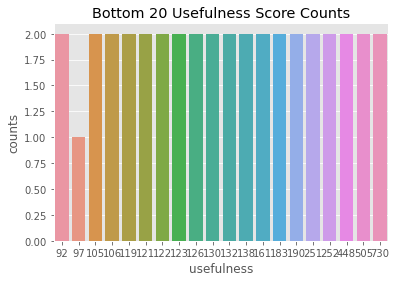

In [22]:
bottom20useful = usefulness.tail(20)
sns.barplot(x = bottom20useful['usefulness'], y = bottom20useful['counts'])
plt.title('Bottom 20 Usefulness Score Counts')
plt.show()

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



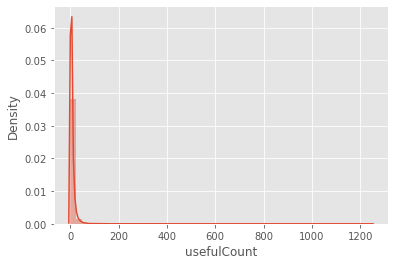

In [23]:
# Question: Melissa: do you know of a different command that does similar thing? This plot is awkward? May be because of the long distribution tail
sns.distplot(bc_merged['usefulCount'])
plt.show()

In [24]:
threshold = 5
below_threshold = sum(sum([bc_merged['usefulCount']< threshold]))
above_threshold = sum(sum([bc_merged['usefulCount']>= threshold]))
print('Percent of birth control reviews below threshold: %.2f percent' % (100 * below_threshold/total_bc))

Percent of birth control reviews below threshold: 49.56 percent


In [25]:
threshold = 1
below_threshold = sum(sum([bc_merged['usefulCount']< threshold]))
above_threshold = sum(sum([bc_merged['usefulCount']>= threshold]))
print('Percent of birth control reviews below threshold: %.2f percent' % (100 * below_threshold/total_bc))

Percent of birth control reviews below threshold: 9.79 percent


Around 50% of the useful counts are below 5.

In [26]:
threshold = 50
below_threshold = sum(sum([bc_merged['usefulCount']< threshold]))
above_threshold = sum(sum([bc_merged['usefulCount']>= threshold]))
print('Percent of birth control reviews below threshold: %.2f percent' % (100 * below_threshold/total_bc))

Percent of birth control reviews below threshold: 98.84 percent


Almost all of the birth control reviews usefulCount are below 50. 

## Useful score dependence on date

In [27]:
# number of reviews per year
revs_year = bc_merged['date'].apply(pd.to_datetime).dt.year
cnt_year = revs_year.value_counts()
cnt_year_sort = cnt_year.sort_index()

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



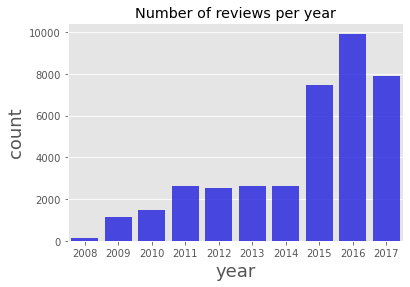

In [28]:
sns.barplot(cnt_year_sort.index, cnt_year_sort.values, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Number of reviews per year')
plt.show()

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



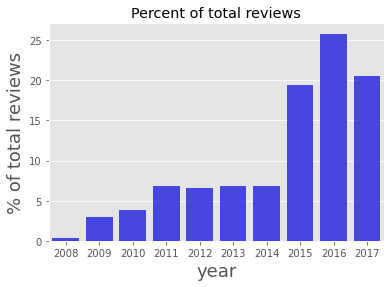

In [69]:
# most of the reviews are in 2015-2017
sns.barplot(cnt_year_sort.index, cnt_year_sort.values/total_bc*100.0, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('% of total reviews', fontsize=18)
plt.title('Percent of total reviews')
plt.show()

In [29]:
bc_merged['year'] = bc_merged['date'].apply(pd.to_datetime).dt.year

Text(0.5, 1.0, 'Mean useful count per year')

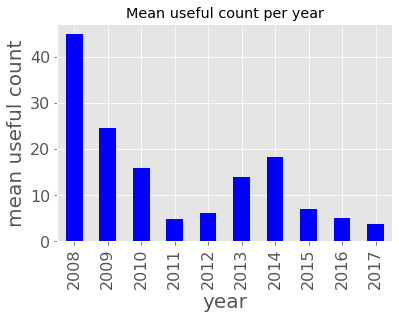

In [30]:
useful_mean = bc_merged.groupby('year')['usefulCount'].mean()
useful_mean.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('mean useful count', fontsize=20)
plt.title('Mean useful count per year')

Text(0.5, 1.0, 'Median useful count per year')

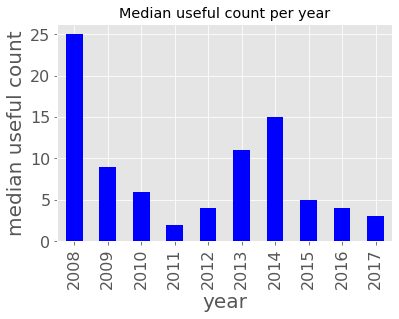

In [31]:
useful_med= bc_merged.groupby('year')['usefulCount'].median()
useful_med.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('median useful count', fontsize=20)
plt.title('Median useful count per year')

Text(0.5, 1.0, 'Maximum useful count per year')

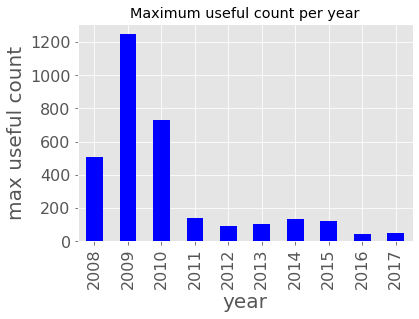

In [32]:
useful_max = bc_merged.groupby('year')['usefulCount'].max()
useful_max.plot(kind='bar', fontsize=16, color = 'blue')
plt.xlabel('year', fontsize=20)
plt.ylabel('max useful count', fontsize=20)
plt.title('Maximum useful count per year')

In [33]:
# percent of useful reviews per year by given threshold
threshold = 5
# adds data frame to determine if useful or not (binary based on threshold)
bc_merged['useful'] = bc_merged['usefulCount'].apply(lambda x: is_useful(x,threshold))

In [47]:
bc_useful = bc_merged[bc_merged['useful']==1]

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



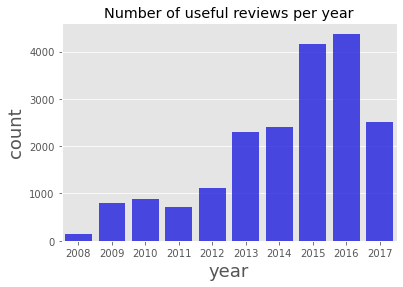

In [50]:
cnt_useful_year = bc_useful['year'].value_counts()
cnt_useful_sort = cnt_useful_year.sort_index()

sns.barplot(cnt_useful_sort.index, cnt_useful_sort.values, alpha=0.8, color = 'blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Number of useful reviews per year')
plt.show()

# note: most reviews are in 2015-2017 so makes sense that time would have most useful reviews by count

C:\Users\melis\anaconda3\envs\data_review\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



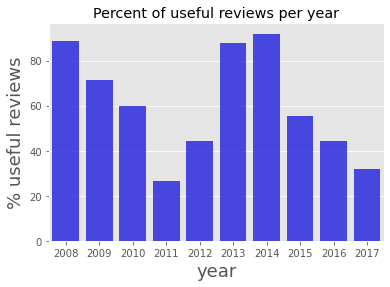

In [70]:
# percent of the reviews each year are useful
cnt_useful_year_percent = cnt_useful_sort/cnt_year_sort*100.0
sns.barplot(cnt_useful_year_percent.index, cnt_useful_year_percent.values, alpha = 0.8, color='blue')
plt.xlabel('year', fontsize=18)
plt.ylabel('% useful reviews', fontsize=18)
plt.title('Percent of useful reviews per year')
plt.show()

## Example reviews

In [34]:
# print n reviews
n = 10
for rev in bc_merged.review.iloc[:n]:
    print(rev, '\n')

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas." 

"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be

In [35]:
bc_10star = bc_merged[bc_merged['rating'] == 10]
# print n rating = 10 reviews
n = 10
for rev in bc_10star.review.iloc[:n]:
    print(rev, '\n')

"My experience during the nexplon is great not a pregnancy yet.  My only issue is it causes me too much bleeding. I get my periods from every other week up to 1 month up to 3 month . And it ruins My sex life" 

"My time with skyla has been an absolute breeze. Ms. Skyla and i have been together since late october 2015 and it has been great. I must admit that the insertion is a bit painful,but you will soon forget. I got cramps for about a weekafter insertion. Nothing that a littlw ibuprofen couldnt tackle. I urge anyone who is thinking about skyla to just do it. I promise it is worth it. Please remember that pain is subjective. Meaning it just depends on the person. " 

"I&#039;ve been on Jolessa for 6 months.  I decided to try this because I get bad headaches during my period (even though they&#039;d only last 3 days, 4 days at most) and I wanted to avoid it altogether.  The first two months, it was great.  Then my period arrived a month early and the bleeding lasted for 25 days, mostl

In [36]:
bc_1star = bc_merged[bc_merged['rating']==1]
# print n rating = 10 reviews
n = 10
for rev in bc_1star.review.iloc[:n]:
    print(rev, '\n')

"I have been on this for 8 months and sad to say it&#039;s caused nothing but my self esteem to become lower. I&#039;ve gained 10 lbs out of no where. I&#039;m only 22 and have a fast metabolism. I thought it started to slow down but it didn&#039;t make sense. My breasts got smaller, I have lost complete sex drive, my breasts aren&#039;t sensitive anymore at all like they used to be and I&#039;m so emotional, even crying at times. The only thing I can say is that it is 100% effective but not worth what it has done to my body. Not only that but I started breaking out on my body and on my face as well." 

"I had the Mirena put in almost a year ago. Insertion was a breeze next to no cramping. My periods have remained heavy and do not show signs of stopping. Have gained about 30 pounds have acne and headaches and backache, so now I am wondering what is next. My doctor would not take it out and wanted me to remain on it for a year. It is almost a year so I am finding a new doctor and gettin

In [37]:
bc_7star = bc_merged[bc_merged['rating']==7]
# print n rating = 10 reviews
n = 10
for rev in bc_7star.review.iloc[:n]:
    print(rev, '\n')

"I have been on pills for years, and in 2012 I tried Mirena. I had cramps and terrible side effects all the time and just had it taken out last month because I have gained around 10lbs in my stomach area. I have been on Nuvaring for about 2 weeks and so far it&#039;s way better. As soon as Mirena was removed my weird stomach pains stopped, but I&#039;m still trying to lose the extra weight. 

" 




I&#039;ll be scheduling an appointment with my doctor soon." 

"Face cleared. Gained 5 pounds. No vomiting for me or irregular mood swings. Also my periods are very very precise. Only bad thing is the super decreased limbo. Just don&#039;t care for it anymore it seems" 

"I had Skyla inserted 9/18/15. Never have I ever been pregnant.  I was 26 at the time of insertion. Insertion was VERY painful.  While the insertion was painful it lasted only 2-3 mins. I had slight pain for 3 days with MAJOR bloating.  I spotted every day for 8 months. It was enough I had to wear a panty liner. Eventually 

In [38]:
bc_5star = bc_merged[bc_merged['rating']==5]
# print n rating = 10 reviews
n = 10
for rev in bc_5star.review.iloc[:n]:
    print(rev, '\n')

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas." 

"I was off birth control for a while considering getting pregnant. I had used other types of birth control before, the pill, the patch, etc. I decided to get back on birth control but didn&#039;t want to worry about taking a daily pill so I re

In [39]:
# arrange data from most to least useful by the usefulCount
useful_bc = bc_merged.sort_values(by = 'usefulCount', ascending=False)

Here we can see some example useful reviews and not useful reviews to get an idea about what the reviews content may be.

In [40]:
bc_highuseful = bc_merged[bc_merged['usefulCount']>300]
# print n rating = 10 reviews
n = 10
for j in range(n):
    print('Useful count: ' + str(bc_highuseful.iloc[j].usefulCount))
    print(bc_highuseful.iloc[j].review)
    print('\n')

Useful count: 1247
"I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are different, but I just hear all these horror stories and I just wanted to tell my story, which is a good one. Hope it calms some of your fears."


Useful count: 730
"I was very nervous about trying Implanon after reading all the negative reviews, but went ahead with it anyway.  The procedure was quick and practically painless.  The spot was tender for a few days and I did have an ugly bruise and now a tiny scar, but nothing that is too terrible.
I started Implanon while I was on my period, which lasted for about 21/2 weeks, give or take.  But the bl

In [41]:
bc_low_useful = bc_merged[bc_merged['usefulCount']==0]
# print n rating = 10 reviews
n = 10
for j in range(n):
    print('Useful count: ' + str(bc_low_useful.iloc[j].usefulCount))
    print(bc_low_useful.iloc[j].review)
    print('\n')

Useful count: 0
"I am torn by the Nuvaring. The convenience is great. There is no daily time to take a pill, only once a month which can easily be marked on a calender or put into a phone. It never falls out, I never feel it and changing it is simple, too. I would give the Nuvaring a 10 out of 10 just based upon the simplicity and the price is really reasonable, too. But, there are some downsides (for me personally). For the first few months, I did not notice side effects, although they are there. I have a VERY low tolerance to alcohol when on the Nuvaring. Very emotional, tired, and strung out all the time. I was on the pill before and none of these happened. I also have longer periods. It&#039;s worth a try, every girl seems to have a different experience!"


Useful count: 0
"I was put on this birth control when I was 15 I was 150lbs I gained 50lbs then I replaced it and got a new one and I&#039;m gaining even more weight it barely helps with periods anymore my periods last for 5 wee

In [42]:
# Print top n most useful reviews by count
n = 10
for rev in useful_bc.review.iloc[:n]:
    print(rev, '\n')

"I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are different, but I just hear all these horror stories and I just wanted to tell my story, which is a good one. Hope it calms some of your fears." 

"I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are 

In [43]:
# Print top n most useful reviews by count
n = 10
for rev in useful_bc.review.iloc[:n]:
    print(rev, '\n')

"I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are different, but I just hear all these horror stories and I just wanted to tell my story, which is a good one. Hope it calms some of your fears." 

"I have had my IUD for over a year now and I think it&#039;s the best thing ever. When I first got it put in I only bled for about a week with a little cramping. After that nothing at all. I haven&#039;t had a period for about 8months until I finally got one, and its not bad at all. It&#039;s light, no cramping, no headache, nothing. I haven&#039;t gained weight, my acne is gone, and my moods are fine. I know all women are 

In [44]:
# Print n least useful reviews
for rev in useful_bc.review.iloc[-n:]:
    print(rev, '\n')

"Best birth control ever. I had it put in during a period in June 2010 and never had another one. I never had spotting or anything negative happen. I did not gain weight or have mood swings. I think it&#039;s great! Give it a shot, it may work great, it may not. Never know until you try." 

"I am 18 years old, I have been on Loestrin 24 Fe for 1 year and 2 months so far and I am very happy with it. Before the pill I had unbearable cramps and my periods were very heavy, however within the first month on the pill my period became light, lasting 4-5 days, and my cramps became barely noticeable. As far as side-effects, honestly, I can be very irritable and/or emotional at times and occasionally a little nauseous, but that only lasts for a couple of minutes. Also, I did not gain any weight. I would recommend trying this pill, however everyone reacts differently." 

"I have been on beyaz for about 4 years and had been very happy with it--it controlled my mild acne which is one of the main re